<a href="https://colab.research.google.com/github/Sagar610/CE888/blob/main/Lab6/Task7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt 
from sklearn import cluster
warnings.filterwarnings('ignore')

In [ ]:
country_data = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/Country-data.csv')
data_dictionary = pd.read_csv('https://raw.githubusercontent.com/sagihaider/CE888_2021/main/Lab_6/Data/data-dictionary.csv')

In [ ]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
data_dictionary

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [ ]:
# Fetch data into x and y variables
x=country_data.iloc[:,1:] # Covariates or input
y=country_data.iloc[:,:1] # Labels or classes or output
print(x.columns)
print(y.columns)

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')
Index(['country'], dtype='object')


In [ ]:
km=cluster.KMeans(n_clusters=3)
km.fit(x)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
clusters_labels=km.labels_

In [ ]:
mapped_countries = list(zip(list(y.values.ravel()),list(clusters_labels)))

In [ ]:
countries_df=pd.DataFrame(mapped_countries, columns=["Country", "Economical Status"])
cleanup={"Economical Status":{0:"Under-developing country", 2:"Developing country", 1:"Developed country"}}
countries_df=countries_df.replace(cleanup)

In [ ]:
countries_df

,Country,Economical Status
0,Afghanistan,Under-developing country
1,Albania,Under-developing country
2,Algeria,Under-developing country
3,Angola,Under-developing country
4,Antigua and Barbuda,Under-developing country
...,...,...
162,Vanuatu,Under-developing country
163,Venezuela,Under-developing country
164,Vietnam,Under-developing country
165,Yemen,Under-developing country


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
countries_df[countries_df.isin(['Developed country']).any(axis=1)]

,Country,Economical Status
23,Brunei,Developed country
82,Kuwait,Developed country
91,Luxembourg,Developed country
114,Norway,Developed country
123,Qatar,Developed country
133,Singapore,Developed country
145,Switzerland,Developed country


In [ ]:
countries_df[countries_df.isin(['Developing country']).any(axis=1)]

,Country,Economical Status
7,Australia,Developing country
8,Austria,Developing country
10,Bahamas,Developing country
11,Bahrain,Developing country
15,Belgium,Developing country
29,Canada,Developing country
42,Cyprus,Developing country
43,Czech Republic,Developing country
44,Denmark,Developing country
49,Equatorial Guinea,Developing country


In [ ]:
countries_df[countries_df.isin(['Under-developing country']).any(axis=1)]

,Country,Economical Status
0,Afghanistan,Under-developing country
1,Albania,Under-developing country
2,Algeria,Under-developing country
3,Angola,Under-developing country
4,Antigua and Barbuda,Under-developing country
5,Argentina,Under-developing country
6,Armenia,Under-developing country
9,Azerbaijan,Under-developing country
12,Bangladesh,Under-developing country
13,Barbados,Under-developing country


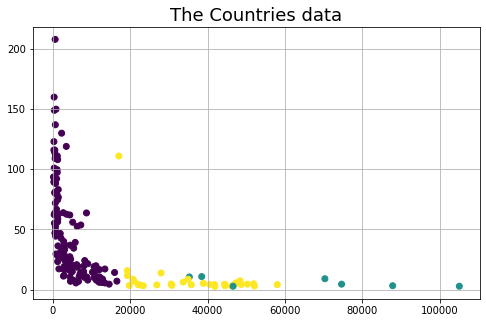

In [ ]:
# Write your code here for task 4
plt.figure(figsize=(8,5))
plt.title("The Countries data", fontsize=18)
plt.grid(True)
plt.scatter(x['gdpp'], x['child_mort'] ,c=clusters_labels)
plt.savefig('Countries_plot.png', dpi=300)
plt.show()

**Conclusion**

The death of children under the age of five, as illustrated in the graph above, is an extremely rare occurrence in countries with high gross domestic product per capita. Turquoise dots were used to represent developed countries. A plethora of purple dots in the figure, on the other hand, denotes underdeveloped countries that cannot afford quality medicine, and as a result, many children die there.